# Q1 : read the nutrition dataset

In [9]:
import pandas as pd
df = pd.read_csv('C:/Users/MASROUR/pyproj/my_env/basedata/HW/HM3/nutrition_subset.txt', sep=",")

In [11]:
df.head(10)

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
5,PARMESAN CHEESE; GRATED 1 TBSP,5.00,1.0,4
6,YEAST; BREWERS; DRY 1 TBSP,8.00,0.0,0
7,LAMB;CHOPS;ARM;BRAISED;LEAN 1.7 OZ,48.00,2.9,59
8,TUNA; CANND; DRND;WATR; WHITE 3 OZ,85.00,0.3,48
9,NONFAT DRY MILK; INSTANTIZED 1 CUP,68.00,0.3,12


# Q3 Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing fooditems of different sizes.


In [14]:
#sorting
sort=df.sort_values(by=['saturated_fat'],ascending=False) # sort by saturated_fat
sort.head(5) #display the five food items highest in saturated_fat
# We can see that we have diffirent fooditems : 1CAKE- 1/2GAL- 1PIE... 

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


# Q4. Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food items highest in saturated fat per gram. Which food has the most saturated fat per gram?


In [16]:
#new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat by the weight in grams. 
df["saturated_fat_per_gram"]=df["saturated_fat"]/df["weight_in_grams"]
df.head()

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000


In [17]:
#Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food items highest in saturated fat per gram.
sort=df.sort_values(by=['saturated_fat_per_gram'],ascending=False) # sort by saturated_fat_per_gram
sort.head(5) #display the five food items highest in saturated_fat

#the food who has the most saturated fat per gram is "BUTTER; SALTED 1 TBSP"

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


# Q5. Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram


In [18]:
#Standardize (zero mean) the field saturated_ fat_ per_gram
from sklearn.preprocessing import StandardScaler
df_sc=df["saturated_fat_per_gram"]
nrmlzd = StandardScaler() 
data_std =nrmlzd.fit_transform(df_sc.values.reshape(-1,1))
data_std= pd.DataFrame(data_std)
print("saturated_fat_per_gram standardized")
data_std.head()

saturated_fat_per_gram standardized


,0
0,-0.562335
1,-0.135401
2,-0.562335
3,2.319472
4,2.327397


In [19]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

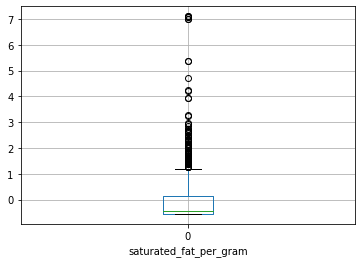

In [20]:
#boxplot
# There are a lot of outliers at the high end of the scale, and there is any outlier at the low end of the scale
data_std.boxplot()
plt.xlabel("saturated_fat_per_gram")
plt.show()

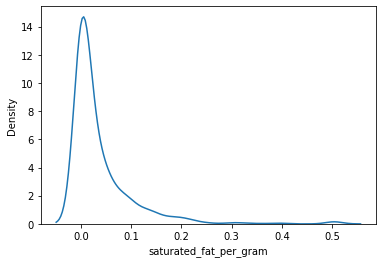

In [24]:
#density plot for saturated_ fat_ per_gram
sns.kdeplot(df["saturated_fat_per_gram"],bw=0.25)
plt.show()

# Q6. Are there any missing values? If so, impute as necessary and explain your approach.

In [12]:
##Number of NaN
# We don't have any missing value
print("The number of missing values for each column")
df.isnull().sum().sort_values(ascending=True)

The number of missing values for each column


food item          0
weight_in_grams    0
saturated_fat      0
cholesterol        0
dtype: int64

# Q7. Standardize (zero mean) the numeric variables, and determine if there are any outliers.

In [29]:
# Standardize (zero mean) the numeric variables
df_x=df[['weight_in_grams', 'saturated_fat', 'cholesterol','saturated_fat_per_gram']]
df[['weight_in_grams', 'saturated_fat', 'cholesterol','saturated_fat_per_gram']] = (df_x-df_x.mean())/df_x.std()
df

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,-0.809561,-0.371136,-0.271369,-0.562043
1,SEAWEED; SPIRULINA; DRIED 1 OZ,-0.688192,-0.296678,-0.271369,-0.135330
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,-0.809561,-0.371136,-0.271369,-0.562043
3,PARMESAN CHEESE; GRATED 1 OZ,-0.688192,0.131453,-0.087975,2.318264
4,PARMESAN CHEESE; GRATED 1 CUP,-0.280880,1.406541,0.387181,2.326185
...,...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,0.173900,-0.371136,-0.271369,-0.562043
957,TEA; BREWED 8 FL OZ,0.514985,-0.371136,-0.271369,-0.562043
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,0.520669,-0.371136,-0.271369,-0.562043
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,-0.764083,-0.371136,-0.271369,-0.562043


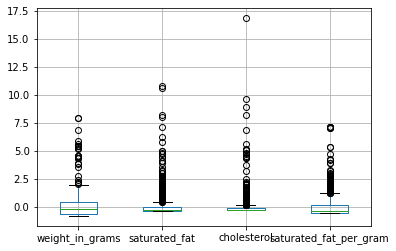

In [30]:
# check outliers : we have many outliers in our dataset for all of numeric variables (see circles below)
df.boxplot()
plt.show()

# Q8. Summarize your findings

**In this section, We learned how to add a column, and  we did the standardization for numeric variables, check if there are outliers or missing values as well**